In [40]:
#pag import han mga libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [41]:
IMAGE_SIZE = 256 #size han image since square hiya (256 x 256)
BATCH_SIZE = 32 # bisan Pira ka batch ikaw la ya bahala
CHANNELS = 3 # gin set ko la ha  3 channels
EPOCHS = 50 # an number han epoch

In [42]:
#pag declare hit dataset

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2548 files belonging to 4 classes.


In [43]:
# pag declare han class names
class_names = dataset.class_names
class_names #print classnames

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Undefined']

In [44]:
# an length han dataset
len(dataset)

80

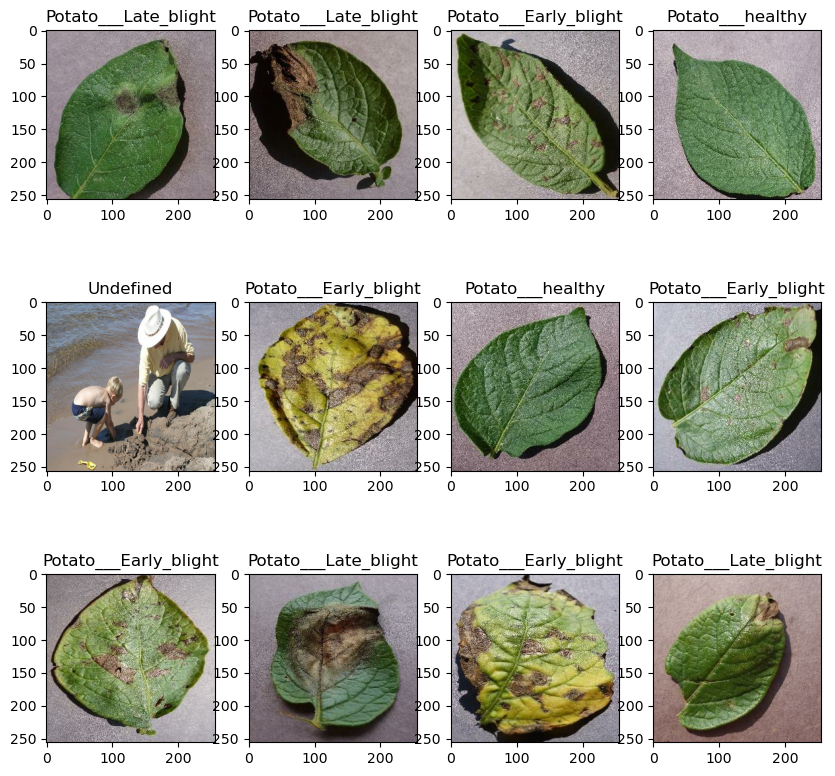

In [45]:
#pag visualize han first batch kumuha la kita hin 12 para la pag visualize
plt.figure(figsize=(10, 10))# size han figure
for image_batch, label_batch in dataset.take(1): #pag kuha han first batch
    for i in range(12):# 12 la na images nat gin kuha ha first bacth which is 32 images dapat kada batch
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) # para pag visualize han data from numbers to labels
        plt.title(class_names[label_batch[i]])
    #print(image_batch.shape)
    #print(label_batch.numpy())

In [46]:
#length han dataset again
len(dataset)

80

In [47]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [63]:
# pag identify kun pira it 80% hit dataset nat ha total dataset
train_size = 0.8 # .8 is 80% han dataset
len(dataset)*train_size #display kun pira ka images it 80% hit aton total dataset

64.0

In [64]:
# so bali han 80 images an iya 80% is 64 images
train_ds = dataset.take(64) # gin gamit ta ngadi an 64 na images
len(train_ds) #print han value han train_ds which is 64

64

In [65]:
test_ds = dataset.skip(54)
len(test_ds)

26

In [74]:
#an pag kuha liwat han 10% which is amo an aton validation size
val_size=0.1 # 0.1 is 10% 
len(dataset)*val_size # 10% han 80 is 10 amo nag 8 hiya na images

8.0

In [75]:
val_ds = test_ds.take(8) # gin kuha la nat an 8 images
len(val_ds) # print

8

In [76]:
test_ds = test_ds.skip(8)
len(test_ds)

0

In [83]:
# amo na ine an pag sub divide han datasets 80% training, 10% validation, 10% test remember naka shuffle ine so mag iiba iba talaga ine.
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds, test_ds


In [84]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [85]:
len(train_ds) # an value na train dataset bali 64 images

64

In [86]:
len(val_ds) # an value nat val_ds / validation dataset

8

In [87]:
len(test_ds) #an value nat test datasets

8

In [88]:
#Pag andam han dataset naka shuffle la gihap
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [89]:
#pag resize han image para hadton mga image na mayda dako na size ig reresize hiya into image size na may value na 256 pixels
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), # 256 x 256
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [90]:
#data augmentation iya ig flip an kada usa na images bali an 1 img na upoat ka copy
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [94]:
# Amo na ine an CNN model architecture using relu activation

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2),),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2),),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [95]:
model.summary() #summary han model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     multiple                  0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [98]:
#pag compile han model using adam optimizer
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [99]:
#adi na an pag train han model
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50

64/64 [==============================] - 55s 735ms/step - loss: 1.0671 - accuracy: 0.4648 - val_loss: 0.8333 - val_accuracy: 0.6162
Epoch 2/50
64/64 [==============================] - 42s 657ms/step - loss: 0.7553 - accuracy: 0.6899 - val_loss: 0.6157 - val_accuracy: 0.7759
Epoch 3/50
64/64 [==============================] - 49s 761ms/step - loss: 0.5730 - accuracy: 0.7930 - val_loss: 0.5082 - val_accuracy: 0.7939
Epoch 4/50
64/64 [==============================] - 48s 758ms/step - loss: 0.3381 - accuracy: 0.8770 - val_loss: 0.3767 - val_accuracy: 0.8594
Epoch 5/50
64/64 [==============================] - 50s 785ms/step - loss: 0.2034 - accuracy: 0.9248 - val_loss: 0.1271 - val_accuracy: 0.9580
Epoch 6/50
64/64 [==============================] - 49s 767ms/step - loss: 0.1703 - accuracy: 0.9438 - val_loss: 0.2171 - val_accuracy: 0.9185
Epoch 7/50
64/64 [==============================] - 48s 757ms/step - loss: 0.1963 - accuracy: 0.9253 - val_loss: 0.9362 - val_accuracy: 0.700

In [101]:
scores = model.evaluate(test_ds) # evaluate han score

64/64 [==============================] - 9s 136ms/step - loss: 0.0535 - accuracy: 0.9805


In [102]:
scores #print han score

[0.053477391600608826, 0.98046875]

In [103]:
history

In [104]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 64}

In [105]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [107]:
history.history['accuracy'] #history han 50 epoch from epoch1 to epoch50

[0.46484375,
 0.68994140625,
 0.79296875,
 0.876953125,
 0.9248046875,
 0.94384765625,
 0.92529296875,
 0.9482421875,
 0.95849609375,
 0.94873046875,
 0.97509765625,
 0.9755859375,
 0.96875,
 0.9736328125,
 0.9736328125,
 0.96142578125,
 0.982421875,
 0.98046875,
 0.98583984375,
 0.97802734375,
 0.9658203125,
 0.986328125,
 0.97021484375,
 0.97900390625,
 0.9853515625,
 0.974609375,
 0.978515625,
 0.99072265625,
 0.9853515625,
 0.98388671875,
 0.984375,
 0.978515625,
 0.98291015625,
 0.98681640625,
 0.994140625,
 0.99169921875,
 0.99267578125,
 0.9892578125,
 0.9560546875,
 0.98193359375,
 0.97900390625,
 0.99169921875,
 0.990234375,
 0.98974609375,
 0.99365234375,
 0.9912109375,
 0.99267578125,
 0.978515625,
 0.9912109375,
 0.98681640625]

In [116]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

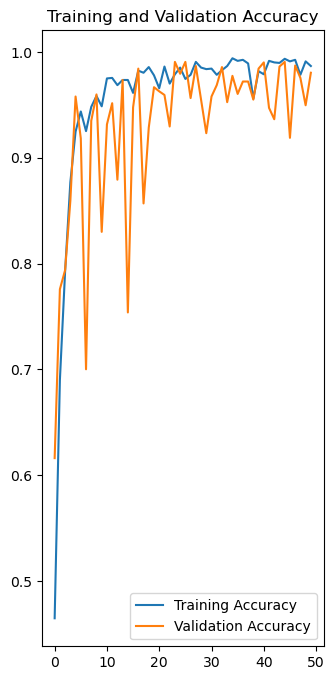

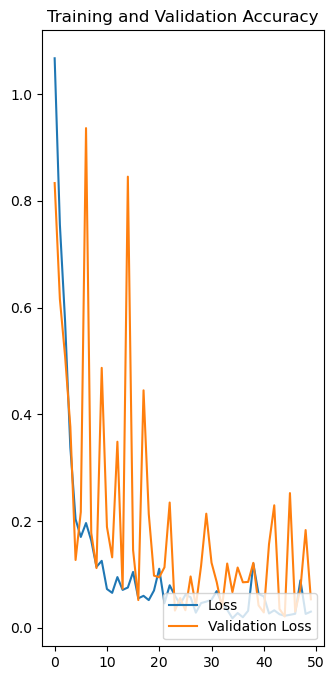

In [121]:
#graph representation han validation and training accuracy

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label='Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Loss and Validation Loss')

In [156]:
np.argmax([5.5793766e-06, 9.9999428e-01, 2.8820448e-08, 1.4676010e-077]) #an pag identify han value base ha level

1

First Image to Predict
First Image Actual Label:  Potato___Early_blight
1/1 [==============================] - 0s 344ms/step
[5.5793766e-06 9.9999428e-01 2.8820448e-08 1.4676010e-07]


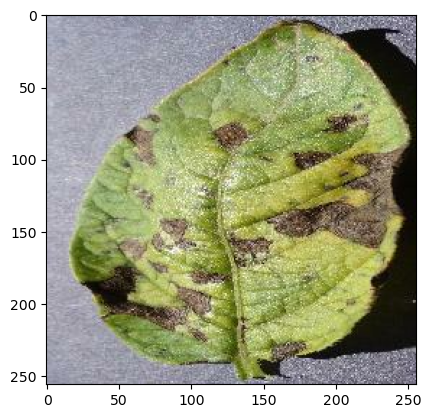

In [175]:
import numpy as np

#pag kuha han first image tas kun ano iya value

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First Image to Predict")
    plt.imshow(first_image)
    print("First Image Actual Label: ",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(batch_prediction[0])

In [178]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 36ms/step


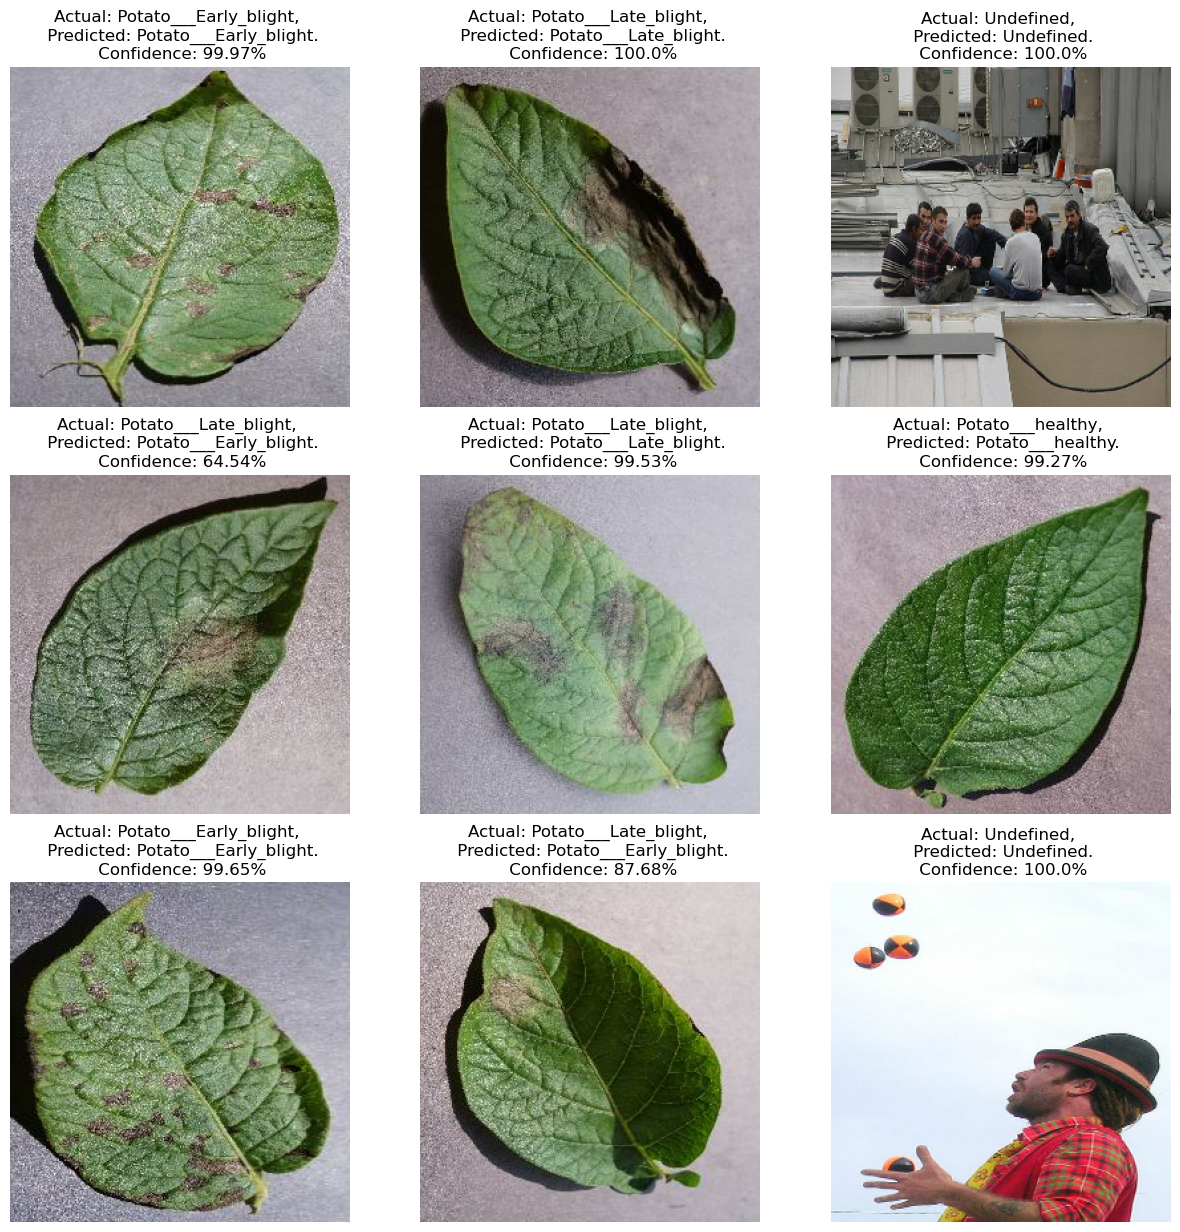

In [180]:
## pag try han model ha 9 na images

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [193]:
import os

# pag save na han model na ma increment hiya usa kada save
model_version=max([int(i) for i in os.listdir("../models") + [0]]) + 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets


In [191]:
model_version=2
model.save(f"../models/{model_version}") # masasave ha model folder 

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
